In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

# 1. 資料準備

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [ ]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [ ]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [ ]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]

# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten,Conv2D,Softmax
from tensorflow.keras import Input,Model

In [ ]:
class CNN_Model(tf.keras.Model):
  def __init__(self):
    super(CNN_Model, self).__init__(name='CNN_Model')
    self.conv1 = Conv2D(filters=32, kernel_size=(5,5),
                        padding='same',activation='relu')
    self.max_pool1 = MaxPooling2D(pool_size=(2, 2))
    self.conv2 = Conv2D(filters=64, kernel_size=(5,5),
                        padding='same',activation='relu')
    self.max_pool2 = MaxPooling2D(pool_size=(2, 2))
    self.flatten = Flatten()
    self.fc1 = Dense(750, activation='relu')
    self.dropout = Dropout(0.5)
    self.out_layer = Dense(10)
    self.softmax = Softmax()
  def call(self, x):
    x = self.conv1(x)  
    x = self.max_pool1(x)
    x = self.conv2(x)      
    x = self.max_pool2(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.dropout(x)
    x = self.out_layer(x)
    x = self.softmax(x)
    return x


In [ ]:
model = CNN_Model()

In [ ]:
model.build(input_shape=(None, 32,32,3))

In [ ]:
print(model.summary())

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  2432      
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  51264     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  30

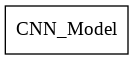

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,
    validation_split=0.2,batch_size=200,epochs=10,verbose=2)       

Epoch 1/10
200/200 - 13s - loss: 1.6046 - acc: 0.4169 - val_loss: 1.3693 - val_acc: 0.5175 - 13s/epoch - 67ms/step
Epoch 2/10
200/200 - 2s - loss: 1.2316 - acc: 0.5633 - val_loss: 1.1283 - val_acc: 0.6036 - 2s/epoch - 11ms/step
Epoch 3/10
200/200 - 2s - loss: 1.0549 - acc: 0.6277 - val_loss: 1.0142 - val_acc: 0.6512 - 2s/epoch - 11ms/step
Epoch 4/10
200/200 - 2s - loss: 0.9285 - acc: 0.6723 - val_loss: 0.9051 - val_acc: 0.6867 - 2s/epoch - 11ms/step
Epoch 5/10
200/200 - 2s - loss: 0.8292 - acc: 0.7090 - val_loss: 0.8861 - val_acc: 0.6943 - 2s/epoch - 10ms/step
Epoch 6/10
200/200 - 2s - loss: 0.7503 - acc: 0.7382 - val_loss: 0.8454 - val_acc: 0.7065 - 2s/epoch - 10ms/step
Epoch 7/10
200/200 - 2s - loss: 0.6681 - acc: 0.7637 - val_loss: 0.8067 - val_acc: 0.7231 - 2s/epoch - 10ms/step
Epoch 8/10
200/200 - 2s - loss: 0.6076 - acc: 0.7872 - val_loss: 0.8461 - val_acc: 0.7143 - 2s/epoch - 10ms/step
Epoch 9/10
200/200 - 2s - loss: 0.5388 - acc: 0.8109 - val_loss: 0.8162 - val_acc: 0.7239 - 2s

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

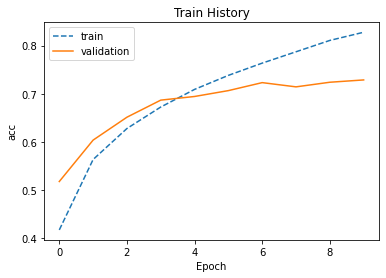

In [ ]:
show_train_history(train_history,'acc','val_acc')

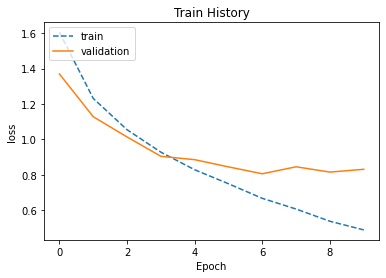

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.8383 - acc: 0.7273 - 1s/epoch - 4ms/step


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.8383458256721497 test_acc= 0.7272999882698059


# 進行預測

In [ ]:
probability = model.predict(x_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [ ]:
prediction

array([3, 8, 8, ..., 5, 4, 7])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

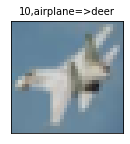

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=1)

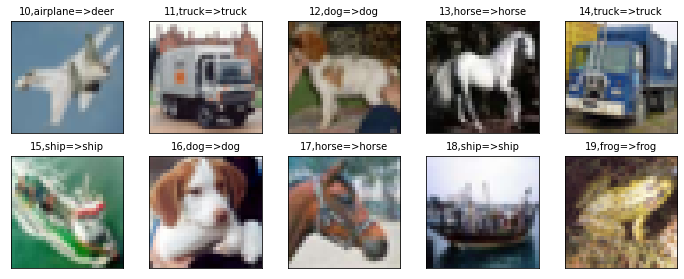

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=10)

# 查看預測機率

In [ ]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

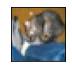

label: cat
predict: cat
airplane   Probability:0.000094963
automobile Probability:0.000383547
bird       Probability:0.000110823
cat        Probability:0.860250592
deer       Probability:0.000466271
dog        Probability:0.126294747
frog       Probability:0.011912546
horse      Probability:0.000018569
ship       Probability:0.000305955
truck      Probability:0.000162019


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0) 

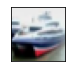

label: ship
predict: ship
airplane   Probability:0.000113722
automobile Probability:0.006934162
bird       Probability:0.000000001
cat        Probability:0.000000005
deer       Probability:0.000000000
dog        Probability:0.000000000
frog       Probability:0.000000000
horse      Probability:0.000000000
ship       Probability:0.992894590
truck      Probability:0.000057509


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1) 

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [ ]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,796,14,35,27,11,3,11,7,63,33
1,17,812,4,16,2,3,8,5,22,111
2,76,3,557,77,100,41,88,30,14,14
3,25,10,52,619,76,94,58,37,10,19
4,22,1,46,86,683,18,63,67,11,3
5,14,1,52,247,59,531,27,50,10,9
6,6,9,29,75,30,8,822,7,7,7
7,21,1,28,49,59,48,8,773,4,9
8,47,23,12,13,10,7,7,3,861,17


#heapmap cm

In [ ]:
import numpy as np

In [ ]:
cm_mat=cm.to_numpy()

In [ ]:
cm_mat

array([[796,  14,  35,  27,  11,   3,  11,   7,  63,  33],
       [ 17, 812,   4,  16,   2,   3,   8,   5,  22, 111],
       [ 76,   3, 557,  77, 100,  41,  88,  30,  14,  14],
       [ 25,  10,  52, 619,  76,  94,  58,  37,  10,  19],
       [ 22,   1,  46,  86, 683,  18,  63,  67,  11,   3],
       [ 14,   1,  52, 247,  59, 531,  27,  50,  10,   9],
       [  6,   9,  29,  75,  30,   8, 822,   7,   7,   7],
       [ 21,   1,  28,  49,  59,  48,   8, 773,   4,   9],
       [ 47,  23,  12,  13,  10,   7,   7,   3, 861,  17],
       [ 28,  57,   9,  29,   1,   9,   9,  14,  25, 819]])

In [ ]:
cm_mat.sum(axis=0)

array([1052,  931,  824, 1238, 1031,  762, 1101,  993, 1027, 1041])

In [ ]:
cm_mat.sum(axis=1)[:, np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [ ]:
cm_norm = np.around(
    cm_mat.astype('float') / 
    cm_mat.sum(axis=1)[:, np.newaxis], 
    decimals=3)

In [ ]:
cm_norm

array([[0.796, 0.014, 0.035, 0.027, 0.011, 0.003, 0.011, 0.007, 0.063,
        0.033],
       [0.017, 0.812, 0.004, 0.016, 0.002, 0.003, 0.008, 0.005, 0.022,
        0.111],
       [0.076, 0.003, 0.557, 0.077, 0.1  , 0.041, 0.088, 0.03 , 0.014,
        0.014],
       [0.025, 0.01 , 0.052, 0.619, 0.076, 0.094, 0.058, 0.037, 0.01 ,
        0.019],
       [0.022, 0.001, 0.046, 0.086, 0.683, 0.018, 0.063, 0.067, 0.011,
        0.003],
       [0.014, 0.001, 0.052, 0.247, 0.059, 0.531, 0.027, 0.05 , 0.01 ,
        0.009],
       [0.006, 0.009, 0.029, 0.075, 0.03 , 0.008, 0.822, 0.007, 0.007,
        0.007],
       [0.021, 0.001, 0.028, 0.049, 0.059, 0.048, 0.008, 0.773, 0.004,
        0.009],
       [0.047, 0.023, 0.012, 0.013, 0.01 , 0.007, 0.007, 0.003, 0.861,
        0.017],
       [0.028, 0.057, 0.009, 0.029, 0.001, 0.009, 0.009, 0.014, 0.025,
        0.819]])

In [ ]:
class_names =["airplane","automobile","bird","cat","deer",
        "dog","frog","horse","ship","truck"]
cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)

In [ ]:
cm_df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,0.796,0.014,0.035,0.027,0.011,0.003,0.011,0.007,0.063,0.033
automobile,0.017,0.812,0.004,0.016,0.002,0.003,0.008,0.005,0.022,0.111
bird,0.076,0.003,0.557,0.077,0.100,0.041,0.088,0.030,0.014,0.014
cat,0.025,0.010,0.052,0.619,0.076,0.094,0.058,0.037,0.010,0.019
deer,0.022,0.001,0.046,0.086,0.683,0.018,0.063,0.067,0.011,0.003
dog,0.014,0.001,0.052,0.247,0.059,0.531,0.027,0.050,0.010,0.009
frog,0.006,0.009,0.029,0.075,0.030,0.008,0.822,0.007,0.007,0.007
horse,0.021,0.001,0.028,0.049,0.059,0.048,0.008,0.773,0.004,0.009
ship,0.047,0.023,0.012,0.013,0.010,0.007,0.007,0.003,0.861,0.017
truck,0.028,0.057,0.009,0.029,0.001,0.009,0.009,0.014,0.025,0.819


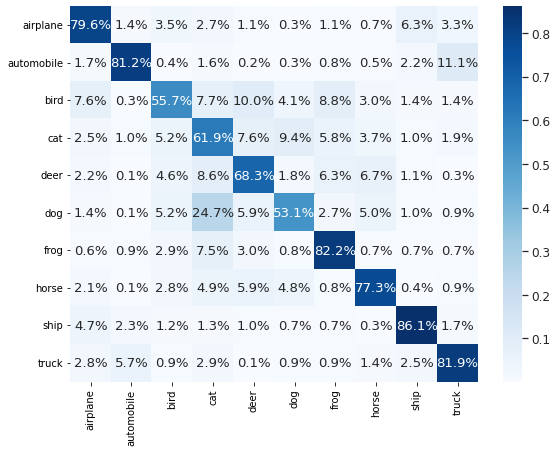

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 6))
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
plt.show()

#CF function

In [ ]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

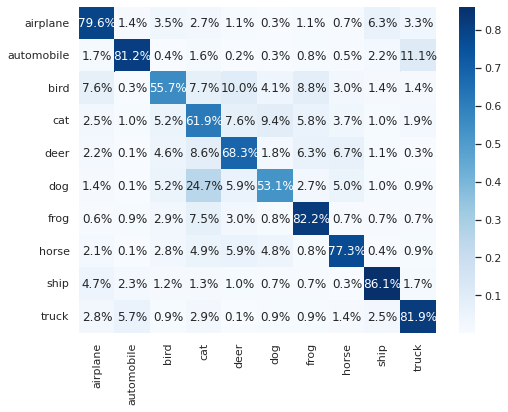

In [ ]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [ ]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,3,3
1,8,8
2,8,8
3,0,0
4,6,6


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
128,5,3
158,5,3
178,5,3
200,5,3
212,5,3
...,...,...
9657,5,3
9759,5,3
9774,5,3
9823,5,3


# 查看預測錯誤資料

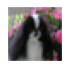

label: dog
predict: dog
airplane   Probability:0.000590213
automobile Probability:0.000063253
bird       Probability:0.002984270
cat        Probability:0.339672744
deer       Probability:0.011335048
dog        Probability:0.471518159
frog       Probability:0.000042909
horse      Probability:0.171513528
ship       Probability:0.000017490
truck      Probability:0.002262367


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,42)

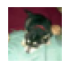

label: dog
predict: cat
airplane   Probability:0.000401464
automobile Probability:0.000862844
bird       Probability:0.000189178
cat        Probability:0.898223758
deer       Probability:0.000055493
dog        Probability:0.095196627
frog       Probability:0.005022627
horse      Probability:0.000004310
ship       Probability:0.000000870
truck      Probability:0.000042690


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,128)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
def Save_model_to_gdrive(model_dir,model_name): 
  path= model_dir+model_name
  os.makedirs(path,exist_ok=True) 
  try:
    model_json = model.to_json()  
    with open(path+"structure.json","w") as json_file:
      json_file.write(model_json)
    model.save(path+"whole.h5",save_format='h5')    
  except: 
    print('No structure')
  model.save(path+"SavedModel",save_format='tf')  
  model.save_weights(path+"weight.h5")    
  os.system("cp -r Model drive/MyDrive")  

In [ ]:
Save_model_to_gdrive(model_dir='Model/',model_name='CifarCNNSub/')

No structure
INFO:tensorflow:Assets written to: Model/CifarCNNSub/SavedModel/assets


In [ ]:
ls -l drive/MyDrive/Model

total 16038
-rw------- 1 root root 16410384 Mar 12 05:57 Cifar_C5P1_ErAuBn.h5
drwx------ 2 root root     4096 Jun 29  2021 CifarCNN/
drwx------ 2 root root     4096 Feb  2 14:35 CifarCNNFunc/
drwx------ 3 root root     4096 May 30 03:22 CifarCNNSub/


In [ ]:
ls -l drive/MyDrive/Model/CifarCNNSub

total 12270
drwx------ 4 root root     4096 May 30 03:22 SavedModel/
-rw------- 1 root root 12559640 May 30 03:22 weight.h5
